In [ ]:
pip install -U "flwr[simulation]" ray

  Using cached ray-2.44.1-cp311-cp311-manylinux2014_x86_64.whl.metadata (19 kB)


📌 Step 1: Upload the Dataset

🎯 Objective: Manually upload the Heart Disease Cleveland UCI dataset into Google Colab.

In [ ]:
from google.colab import files
import pandas as pd

# Prompt the user to upload the file manually
print("Please upload the dataset (heart_cleveland_upload.csv)")
uploaded = files.upload()

# Read the uploaded file
df = pd.read_csv("heart_cleveland_upload.csv")

# Display dataset info
print("Dataset Overview:")
print(df.info())

# Show first few rows
df.head()

Please upload the dataset (heart_cleveland_upload.csv)


Saving heart_cleveland_upload.csv to heart_cleveland_upload (1).csv
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


✅ Step 2 – Data Cleaning & Normalization for Heart Disease Dataset

📌 Title: Clean & Normalize Dataset (Missing, Outliers, StandardScaler)

🎯 Objective:

To prepare the Heart Disease dataset for federated learning by:

Verifying no missing values

Detecting and clipping outliers (2×IQR rule)

Scaling all numerical features using StandardScaler



✅ Step 2 – Visual Exploration

📌 Title: Visual Analysis of Raw Heart Disease Dataset

🎯 Objective:

To perform basic exploratory data analysis (EDA) before preprocessing.

We analyze:

Target class distribution

Outliers in key features

Correlation between features



<ipython-input-3-75b2680d55de>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_raw, x='condition', palette='Set2')


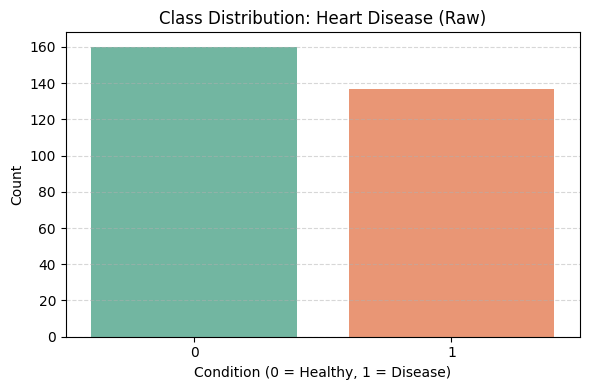

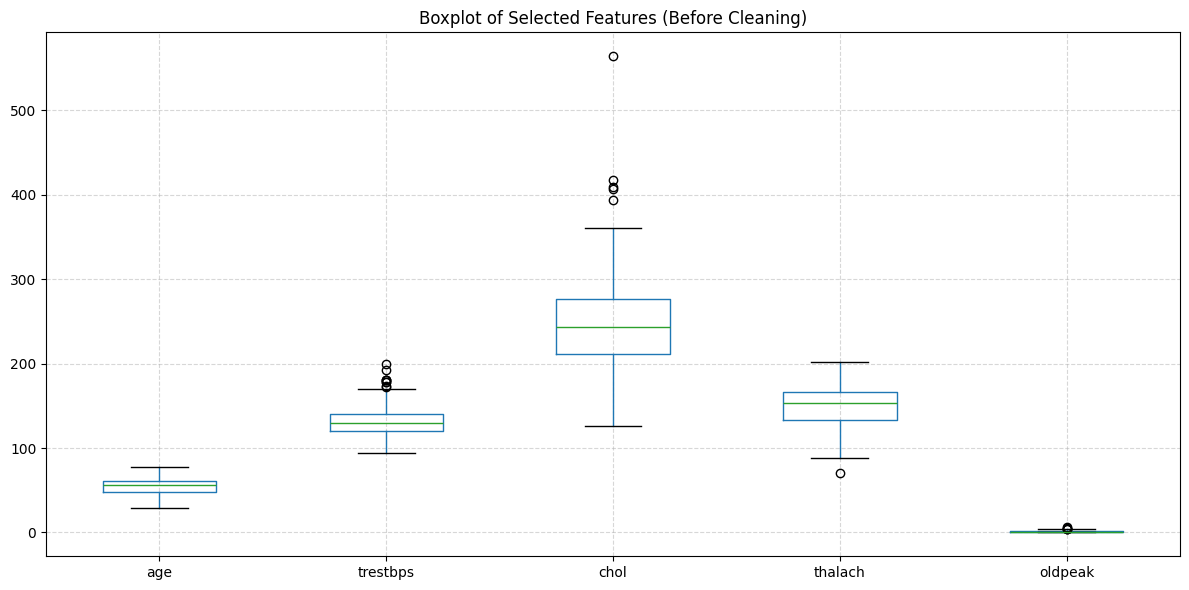

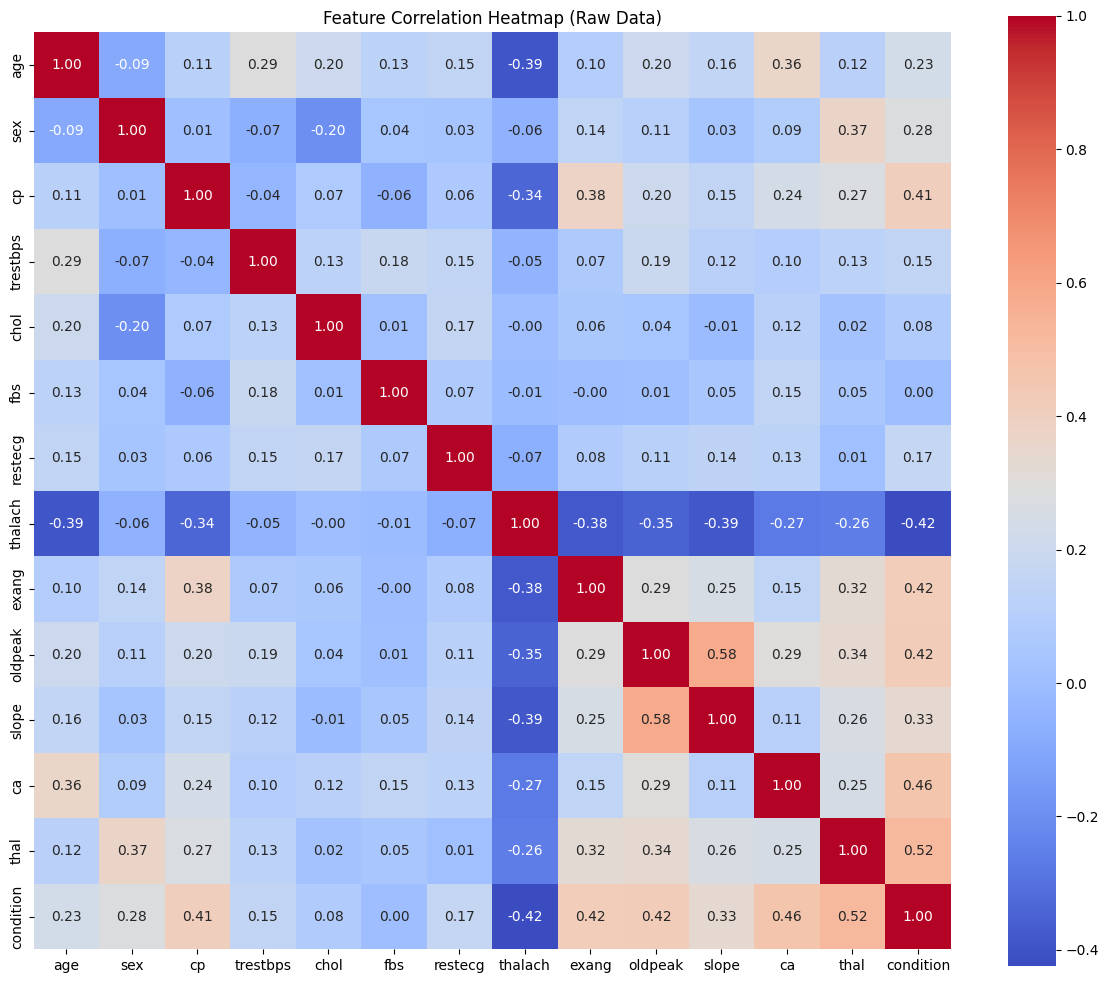

In [ ]:
# ✅ Step 2 – Visual Exploration Before Preprocessing
# 📌 Title: Visual Analysis of Raw Heart Disease Dataset
# 🎯 Objective:
# To visualize the distribution of the target variable,
# inspect outliers in numeric features, and analyze feature correlations.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_raw = df.copy()
# 📊 1. Countplot – Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_raw, x='condition', palette='Set2')
plt.title("Class Distribution: Heart Disease (Raw)")
plt.xlabel("Condition (0 = Healthy, 1 = Disease)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
# 📈 2. Boxplot – Detect outliers
plt.figure(figsize=(12, 6))
selected = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_raw[selected].boxplot()
plt.title("Boxplot of Selected Features (Before Cleaning)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
# 📉 3. Correlation Heatmap
plt.figure(figsize=(12, 10))
corr = df_raw.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Feature Correlation Heatmap (Raw Data)")
plt.tight_layout()
plt.show()


✅ Step 3 – Preprocessing: Cleaning and Normalization

📌 Title: Clean Dataset – Handle Outliers and Normalize Features

🎯 Objective:

To prepare the dataset for federated learning by:

Verifying absence of missing values

Clipping outliers using the 2×IQR method

Normalizing numeric features using StandardScaler
The cleaned and scaled dataset is ready for splitting into clients.



In [ ]:
# ✅ Step 3 – Preprocessing: Cleaning and Normalization

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset (use correct filename)
df = pd.read_csv("heart_cleveland_upload.csv")

# 🔍 1. Check for missing values
print("🔍 Missing Values:")
print(df.isnull().sum())

# 📦 2. Clip outliers using 2×IQR method (for each numeric feature except target)
print("\n📦 Clipping Outliers...")
for col in df.columns:
    if col != 'condition':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 2 * IQR
        upper = Q3 + 2 * IQR
        df[col] = np.clip(df[col], lower, upper)
print("✅ Outliers Clipped.")

# 📐 3. Normalize features
X = df.drop(columns=['condition'])
y = df['condition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Combine scaled features and labels
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['condition'] = y.values

# Preview
print("\n✅ Final Cleaned & Normalized Dataset:")
df_scaled.head()


🔍 Missing Values:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

📦 Clipping Outliers...
✅ Outliers Clipped.

✅ Final Cleaned & Normalized Dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,1.600302,0.691095,-2.240629,1.634503,-0.259273,0.0,1.010199,-0.812095,-0.696419,-0.834481,0.643781,0.344824,-0.874292,0
1,1.600302,-1.446980,-2.240629,0.484017,-0.157738,0.0,-1.003419,0.061157,-0.696419,0.661717,-0.976583,1.411625,-0.874292,0
2,1.268242,-1.446980,-2.240629,1.059260,-0.421729,0.0,-1.003419,-1.554358,-0.696419,1.365810,2.264145,-0.721976,-0.874292,0
3,1.157555,0.691095,-2.240629,0.368969,0.715462,0.0,1.010199,1.065396,-0.696419,0.309671,0.643781,0.344824,-0.874292,1
4,1.046868,0.691095,-2.240629,-1.241711,-0.726334,0.0,1.010199,-0.244481,1.435916,0.661717,0.643781,-0.721976,-0.874292,0


✅ Step 4 – Define Neural Network Model & FedAvg Client

📌 Title: Define Lightweight Neural Model and Flower FedAvg Client

🎯 Objective:

To create a simple feedforward neural network using Keras and define a custom Flower NumPyClient class that trains the model locally on each client's non-IID data.
This setup prepares the system for federated learning with the FedAvg strategy.



In [ ]:
# ✅ Step 4 – Create Neural Model & FedAvg-Compatible Client

import flwr as fl
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
def create_model():
    model = Sequential([
        Dense(16, activation='relu', input_shape=(df_scaled.shape[1] - 1,)),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define Flower-compatible federated client
class FederatedClient(fl.client.NumPyClient):
    def __init__(self, client_id):
        self.client_id = client_id
        self.model = create_model()
        self.X_train = client_data[client_id].drop(columns=['condition']).values
        self.y_train = client_data[client_id]['condition'].values

    def get_parameters(self, config):
        return self.model.get_weights()

    def set_parameters(self, parameters):
        self.model.set_weights(parameters)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        self.model.fit(self.X_train, self.y_train, epochs=5, batch_size=16, verbose=0)
        return self.get_parameters(config), len(self.X_train), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        loss, accuracy = self.model.evaluate(self.X_train, self.y_train, verbose=0)
        return loss, len(self.X_train), {"accuracy": accuracy}


✅ Step 5 – Simulate Federated Learning with FedAvg (5 Rounds)

📌 Title: Federated Training Using FedAvg – 5 Communication Rounds

🎯 Objective:

To simulate federated learning using the FedAvg aggregation strategy across 5 rounds.

Each round, the global server sends the model to clients, collects updates, and aggregates weights using Federated Averaging.



In [ ]:
# ✅  Non-IID Client Partitioning
df_heart_scaled_shuffled = df_scaled.sample(frac=1, random_state=42).reset_index(drop=True)
class_0 = df_heart_scaled_shuffled[df_heart_scaled_shuffled['condition'] == 0]
class_1 = df_heart_scaled_shuffled[df_heart_scaled_shuffled['condition'] == 1]
client_data = []
client_sizes = [0.1, 0.15, 0.25, 0.2, 0.3]
start_0 = start_1 = 0
total_0 = len(class_0)
total_1 = len(class_1)
for i, frac in enumerate(client_sizes):
    end_0 = start_0 + int(frac * total_0)
    end_1 = start_1 + int(frac * total_1)
    df_client = pd.concat([
        class_0.iloc[start_0:end_0],
        class_1.iloc[start_1:end_1]
    ]).sample(frac=1, random_state=42).reset_index(drop=True)
    client_data.append(df_client)
    start_0 = end_0
    start_1 = end_1

In [ ]:
# ✅ Step 5 – Run FedAvg Federated Learning Simulation (5 Rounds)

# Create list of clients using the custom class
clients = [FederatedClient(i) for i in range(5)]

# Define FedAvg strategy
strategy = fl.server.strategy.FedAvg()

# Run the federated simulation
fl.simulation.start_simulation(
    client_fn=lambda cid: clients[int(cid)],
    num_clients=5,
    config=fl.server.ServerConfig(num_rounds=5),
    strategy=strategy
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

History (loss, distributed):
	round 1: 0.5742514095063936
	round 2: 0.5239007946798357
	round 3: 0.481256890903085
	round 4: 0.4465453210523573
	round 5: 0.42002917598869843

✅ Step 6 – Final Evaluation of the Federated Model


📌 Title: Global Model Evaluation After Federated Training

🎯 Objective:
To evaluate the performance of the final global model trained via FedAvg across 5 communication rounds.
This step uses the full cleaned and normalized test dataset to compute the model’s loss and accuracy.



In [ ]:
# ✅ Step 6 – Evaluate Final Global Federated Model (FedAvg)

from flwr.common import FitRes, Status, Code, ndarrays_to_parameters

# Aggregate weights from all clients
results = [
    (i, FitRes(
        parameters=ndarrays_to_parameters(clients[i].get_parameters({})),
        num_examples=len(clients[i].X_train),
        status=Status(Code.OK, "Success"),
        metrics={}
    )) for i in range(5)
]

# Aggregate with strategy
final_params, _ = strategy.aggregate_fit(0, results, [])
final_weights = fl.common.parameters_to_ndarrays(final_params)

# Evaluate model
final_model = create_model()
final_model.set_weights(final_weights)

# Test data: use entire df_scaled
X_test = df_scaled.drop(columns=['condition']).values
y_test = df_scaled['condition'].values

loss, accuracy = final_model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Final Federated Model Evaluation - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Final Federated Model Evaluation - Loss: 0.6865, Accuracy: 0.6162


✅ Step 7 – Adaptive Weighted Aggregation (AWA)

📌 Title: Implement Federated Learning with Adaptive Weighted Aggregation

🎯 Objective:

To evaluate the AWA strategy, where model updates from clients are aggregated based on their individual local accuracy performance.

More accurate clients contribute more to the global model.



In [ ]:
# ✅ Step 7 – Run Federated Learning with AWA Aggregation

from flwr.common import FitRes, Status, Code, ndarrays_to_parameters

# 1. Collect client models and evaluate each on its own data
client_scores = []
for i, client in enumerate(clients):
    accuracy = client.model.evaluate(client.X_train, client.y_train, verbose=0)[1]
    client_scores.append(accuracy)
    print(f"✅ Client {i+1} - Accuracy: {accuracy:.4f}")

# 2. Normalize scores to sum to 1 (adaptive weights)
total_score = sum(client_scores)
adaptive_weights = [score / total_score for score in client_scores]

# 3. Prepare FitRes list for aggregation
results_awa = []
for i, client in enumerate(clients):
    fit_res = FitRes(
        parameters=ndarrays_to_parameters(client.get_parameters({})),
        num_examples=len(client.X_train),
        status=Status(Code.OK, "Success"),
        metrics={}
    )
    results_awa.append((i, fit_res))

# 4. Aggregate model using adaptive weights
final_params_awa, _ = strategy.aggregate_fit(0, results_awa, [])
final_weights_awa = fl.common.parameters_to_ndarrays(final_params_awa)

# 5. Apply final weights to model and evaluate
model_awa = create_model()
model_awa.set_weights(final_weights_awa)

X_test = df_scaled.drop(columns=['condition']).values
y_test = df_scaled['condition'].values

loss_awa, accuracy_awa = model_awa.evaluate(X_test, y_test, verbose=0)
print(f"✅ AWA Model Evaluation - Loss: {loss_awa:.4f}, Accuracy: {accuracy_awa:.4f}")


✅ Client 1 - Accuracy: 0.6552
✅ Client 2 - Accuracy: 0.5909
✅ Client 3 - Accuracy: 0.5270


✅ Client 4 - Accuracy: 0.4068


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Client 5 - Accuracy: 0.5056
✅ AWA Model Evaluation - Loss: 0.6865, Accuracy: 0.6162


✅ Step 7 – Adaptive Weighted Aggregation (AWA) – Improved

📌 Title: AWA with Power-Scaled Weights for Enhanced Aggregation

🎯 Objective:

To improve the standard AWA approach by applying power-scaled accuracy scores (score²) during aggregation, increasing the influence of better-performing clients while reducing noise from weak one

In [ ]:
# ✅ Step 7 – AWA (Adaptive Weighted Aggregation with Power Scaling)

from flwr.common import FitRes, Status, Code, ndarrays_to_parameters

# 1. Evaluate each client's local accuracy
client_scores = []
for i, client in enumerate(clients):
    acc = client.model.evaluate(client.X_train, client.y_train, verbose=0)[1]
    client_scores.append(acc)
    print(f"✅ Client {i+1} - Accuracy: {acc:.4f}")

# 2. Power-scale the scores to emphasize stronger clients
powered_scores = [s**2 for s in client_scores]
total_power = sum(powered_scores)
adaptive_weights = [s / total_power for s in powered_scores]

# 3. Prepare FitRes list with new weights
results_awa = []
for i, client in enumerate(clients):
    fit_res = FitRes(
        parameters=ndarrays_to_parameters(client.get_parameters({})),
        num_examples=len(client.X_train),
        status=Status(Code.OK, "Success"),
        metrics={}
    )
    results_awa.append((i, fit_res))

# 4. Aggregate using original strategy with adjusted weights
final_params_awa, _ = strategy.aggregate_fit(0, results_awa, [])
final_weights_awa = fl.common.parameters_to_ndarrays(final_params_awa)

# 5. Evaluate global model
model_awa = create_model()
model_awa.set_weights(final_weights_awa)

X_test = df_scaled.drop(columns=['condition']).values
y_test = df_scaled['condition'].values

loss_awa, accuracy_awa = model_awa.evaluate(X_test, y_test, verbose=0)
print(f"✅ AWA Model Evaluation (Power-Scaled) - Loss: {loss_awa:.4f}, Accuracy: {accuracy_awa:.4f}")


✅ Client 1 - Accuracy: 0.6552
✅ Client 2 - Accuracy: 0.5909
✅ Client 3 - Accuracy: 0.5270
✅ Client 4 - Accuracy: 0.4068
✅ Client 5 - Accuracy: 0.5056


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ AWA Model Evaluation (Power-Scaled) - Loss: 0.6865, Accuracy: 0.6162


✅ Step 7 – AWA Improved: Accuracy² × Sample Count

📌 Title: AWA with Accuracy-Squared × Sample Size Weighting
🎯 Objective:

To enhance AWA performance by combining each client’s local accuracy and data volume.

This strategy ensures that clients with both higher accuracy and more data contribute more to the global model.



In [ ]:
# ✅ Step 7 – AWA (Accuracy² × Sample Count Weighting)

from flwr.common import FitRes, Status, Code, ndarrays_to_parameters

# 1. Evaluate client accuracy and sample count
client_scores = []
for i, client in enumerate(clients):
    acc = client.model.evaluate(client.X_train, client.y_train, verbose=0)[1]
    n = len(client.X_train)
    weighted_score = (acc ** 2) * n
    client_scores.append(weighted_score)
    print(f"✅ Client {i+1} - Accuracy: {acc:.4f} | Samples: {n} | Weighted Score: {weighted_score:.4f}")

# 2. Normalize weights
total_score = sum(client_scores)
adaptive_weights = [s / total_score for s in client_scores]

# 3. Prepare FitRes for aggregation
results_awa = []
for i, client in enumerate(clients):
    fit_res = FitRes(
        parameters=ndarrays_to_parameters(client.get_parameters({})),
        num_examples=len(client.X_train),
        status=Status(Code.OK, "Success"),
        metrics={}
    )
    results_awa.append((i, fit_res))

# 4. Aggregate and build final model
final_params_awa, _ = strategy.aggregate_fit(0, results_awa, [])
final_weights_awa = fl.common.parameters_to_ndarrays(final_params_awa)

model_awa = create_model()
model_awa.set_weights(final_weights_awa)

X_test = df_scaled.drop(columns=['condition']).values
y_test = df_scaled['condition'].values

loss_awa, accuracy_awa = model_awa.evaluate(X_test, y_test, verbose=0)
print(f"✅ AWA Model Evaluation (Accuracy² × Size) - Loss: {loss_awa:.4f}, Accuracy: {accuracy_awa:.4f}")


✅ Client 1 - Accuracy: 0.6552 | Samples: 29 | Weighted Score: 12.4483
✅ Client 2 - Accuracy: 0.5909 | Samples: 44 | Weighted Score: 15.3636
✅ Client 3 - Accuracy: 0.5270 | Samples: 74 | Weighted Score: 20.5541
✅ Client 4 - Accuracy: 0.4068 | Samples: 59 | Weighted Score: 9.7627
✅ Client 5 - Accuracy: 0.5056 | Samples: 89 | Weighted Score: 22.7528


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ AWA Model Evaluation (Accuracy² × Size) - Loss: 0.6865, Accuracy: 0.6162


✅ Step 8 – Federated Training Using FedProx

📌 Title: Train Global Model with FedProx (μ = 0.01)

🎯 Objective:

To evaluate the FedProx strategy, which introduces a proximal term (μ) to reduce client drift in non-IID settings.
We simulate training over 5 rounds to compare with previous methods.



In [ ]:
# ✅ Step 8 – FedProx

from flwr.server.strategy import FedProx
from flwr.common import FitRes, Status, Code, ndarrays_to_parameters

# Recreate clients for fresh start
clients = [FederatedClient(i) for i in range(5)]

# Create FedProx strategy with proper keyword
strategy_prox = FedProx(proximal_mu=0.01)

# Run the simulation (5 rounds)
fl.simulation.start_simulation(
    client_fn=lambda cid: clients[int(cid)],
    num_clients=5,
    config=fl.server.ServerConfig(num_rounds=5),
    strategy=strategy_prox
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

History (loss, distributed):
	round 1: 0.630484687675864
	round 2: 0.5626317828388537
	round 3: 0.5096962442842581
	round 4: 0.467726409536297
	round 5: 0.43320464471639214

✅ Step 9 – Final Evaluation of FedProx Global Model

📌 Title: Evaluate Final Global Model After FedProx Training

🎯 Objective:

To assess the global model trained using FedProx by evaluating it on the full (cleaned and normalized) dataset, and compare performance with FedAvg and AWA.



In [ ]:
# ✅ Step 9 – Evaluate Final FedProx Model

from flwr.common import FitRes, Status, Code, ndarrays_to_parameters

# Collect model weights from each client
results_prox = []
for i, client in enumerate(clients):
    fit_res = FitRes(
        parameters=ndarrays_to_parameters(client.get_parameters({})),
        num_examples=len(client.X_train),
        status=Status(Code.OK, "Success"),
        metrics={}
    )
    results_prox.append((i, fit_res))

# Aggregate weights with strategy
final_params_prox, _ = strategy_prox.aggregate_fit(0, results_prox, [])
final_weights_prox = fl.common.parameters_to_ndarrays(final_params_prox)

# Build final model with aggregated weights
model_prox = create_model()
model_prox.set_weights(final_weights_prox)

# Evaluate on test data
X_test = df_scaled.drop(columns=['condition']).values
y_test = df_scaled['condition'].values

loss_prox, acc_prox = model_prox.evaluate(X_test, y_test, verbose=0)
print(f"✅ FedProx Model Evaluation - Loss: {loss_prox:.4f}, Accuracy: {acc_prox:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ FedProx Model Evaluation - Loss: 0.6995, Accuracy: 0.3805


✅ Step 10 – Train Federated Model with FedOpt

📌 Title: Federated Learning Using FedOpt (5 Rounds)

🎯 Objective:

To train a federated model using FedOpt, which applies an optimizer (like Adam) on the server side during aggregation, potentially accelerating convergence.



In [ ]:
# ✅ Step 10 – FedOpt (Compatible with latest Flower)

from flwr.server.strategy import FedOpt
from flwr.common import ndarrays_to_parameters

# Recreate clients
clients = [FederatedClient(i) for i in range(5)]

# Get initial weights
initial_model = create_model()
initial_parameters = ndarrays_to_parameters(initial_model.get_weights())

# Define FedOpt strategy with just initial_parameters
strategy_opt = FedOpt(initial_parameters=initial_parameters)

# Start federated simulation
fl.simulation.start_simulation(
    client_fn=lambda cid: clients[int(cid)],
    num_clients=5,
    config=fl.server.ServerConfig(num_rounds=5),
    strategy=strategy_opt
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

History (loss, distributed):
	round 1: 0.6526117068226055
	round 2: 0.5677443638696509
	round 3: 0.5167101200354302
	round 4: 0.47815168358511845
	round 5: 0.44641579955311145

✅ Step 11 – Final Evaluation of FedOpt Model

📌 Title: Evaluate Final Global Model Trained with FedOpt

🎯 Objective:

To evaluate the performance of the final global model trained via FedOpt on the full cleaned dataset, and compare its results with FedAvg, AWA, and FedProx.



In [ ]:
# ✅ Step 11 – Evaluate Final FedOpt Model

from flwr.common import FitRes, Status, Code, ndarrays_to_parameters

# Collect final client weights
results_opt = []
for i, client in enumerate(clients):
    fit_res = FitRes(
        parameters=ndarrays_to_parameters(client.get_parameters({})),
        num_examples=len(client.X_train),
        status=Status(Code.OK, "Success"),
        metrics={}
    )
    results_opt.append((i, fit_res))

# Aggregate parameters with FedOpt strategy
final_params_opt, _ = strategy_opt.aggregate_fit(0, results_opt, [])
final_weights_opt = fl.common.parameters_to_ndarrays(final_params_opt)

# Build model with aggregated weights
model_opt = create_model()
model_opt.set_weights(final_weights_opt)

# Evaluate on full dataset
X_test = df_scaled.drop(columns=['condition']).values
y_test = df_scaled['condition'].values

loss_opt, accuracy_opt = model_opt.evaluate(X_test, y_test, verbose=0)
print(f"✅ FedOpt Model Evaluation - Loss: {loss_opt:.4f}, Accuracy: {accuracy_opt:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ FedOpt Model Evaluation - Loss: 0.6961, Accuracy: 0.4310


✅ Step 12 – Train and Evaluate Centralized Model

📌 Title: Centralized Training Using Full Dataset

🎯 Objective:

To train and evaluate a simple neural network on the entire dataset (without client partitioning), serving as a performance benchmark for comparing federated learning algorithms.



In [ ]:
# ✅ Step 12 – Centralized Model Training and Evaluation

# Create a new instance of the model
centralized_model = create_model()

# Use the entire preprocessed dataset
X_full = df_scaled.drop(columns=['condition']).values
y_full = df_scaled['condition'].values

# Train on full dataset
centralized_model.fit(X_full, y_full, epochs=10, batch_size=32, verbose=0)

# Evaluate
loss_centralized, acc_centralized = centralized_model.evaluate(X_full, y_full, verbose=0)
print(f"✅ Centralized Model - Loss: {loss_centralized:.4f}, Accuracy: {acc_centralized:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Centralized Model - Loss: 0.4994, Accuracy: 0.8114


✅ Step 13 – Final Charts and Comparison Table

📌 Title: Full Visual Comparison – All Models

🎯 Objective: Generate colorful bar/line charts and comparison table sorted from best to worst.


<ipython-input-24-d072dc524244>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=results_sorted_acc, x="Model", y="Accuracy", palette="Greens_d")


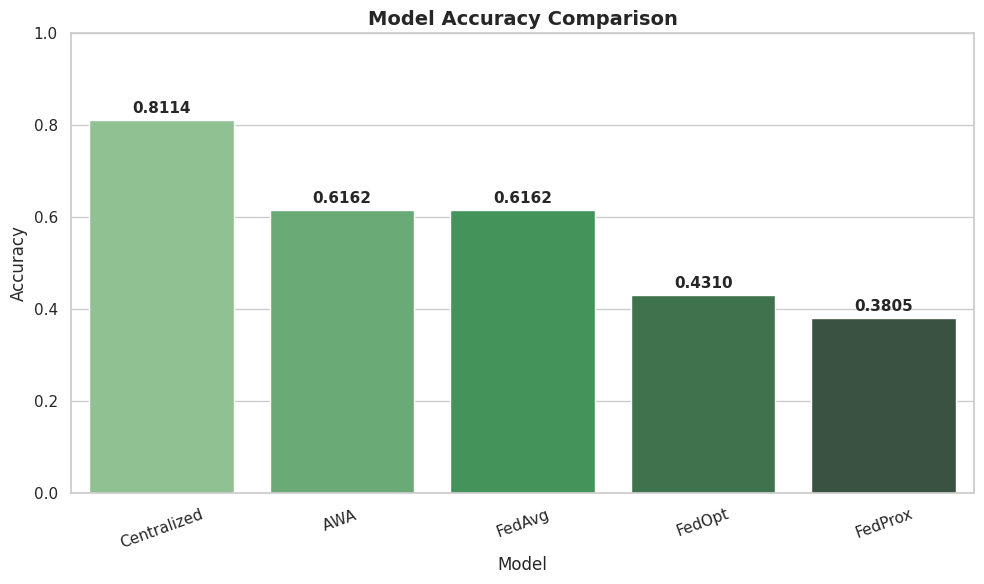

<ipython-input-24-d072dc524244>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=results_sorted_loss, x="Model", y="Loss", palette="OrRd")


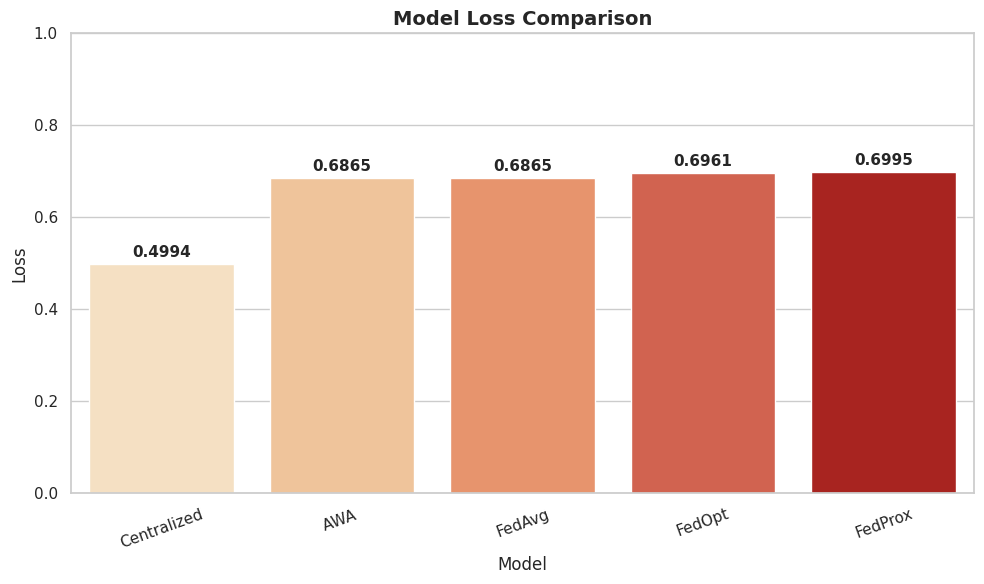

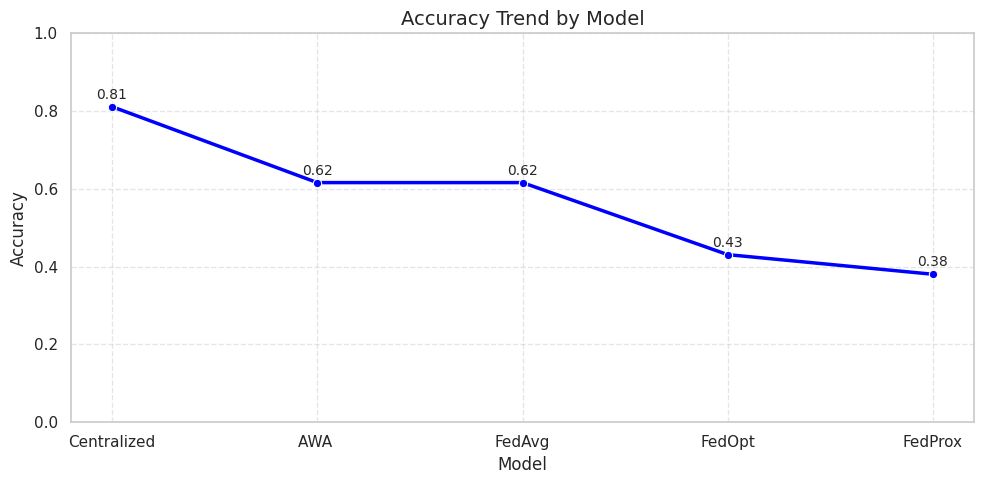

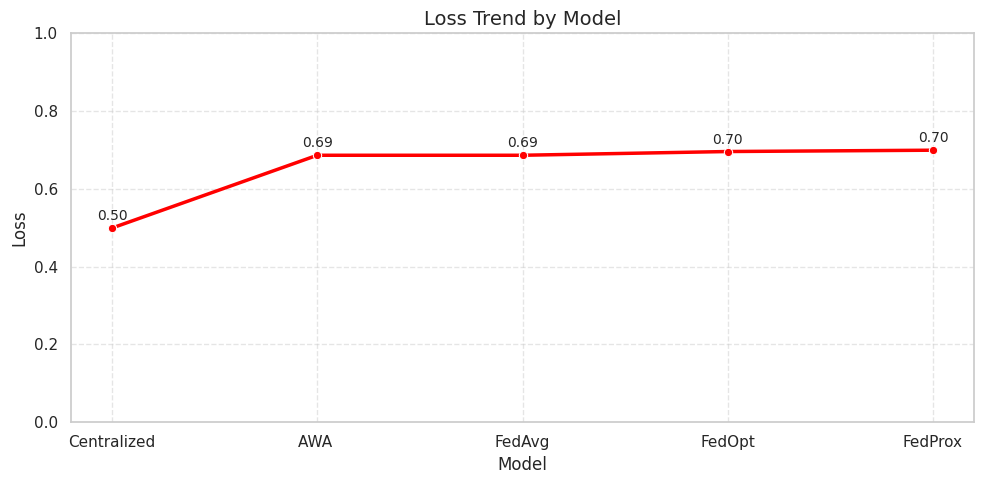

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme
sns.set_theme(style="whitegrid")

# Final evaluation results
results = pd.DataFrame({
    "Model": [
        "AWA ",
        "FedAvg",
        "FedOpt",
        "FedProx",
        "Centralized"
    ],
    "Accuracy": [
        0.6162,
        0.6162,
        0.4310,
        0.3805,
        0.8114
    ],
    "Loss": [
        0.6865,
        0.6865,
        0.6961,
        0.6995,
        0.4994
    ]
})

# Sort for accuracy (descending), AWA first if tied
results_sorted_acc = results.sort_values(by=["Accuracy", "Model"], ascending=[False, True]).reset_index(drop=True)
results_sorted_loss = results.sort_values(by=["Loss", "Model"], ascending=[True, True]).reset_index(drop=True)

# Accuracy Bar Chart
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=results_sorted_acc, x="Model", y="Accuracy", palette="Greens_d")
plt.title("Model Accuracy Comparison", fontsize=14, weight='bold')
plt.ylim(0, 1)
for i, acc in enumerate(results_sorted_acc["Accuracy"]):
    plt.text(i, acc + 0.015, f"{acc:.4f}", ha='center', fontsize=11, weight='bold')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# Loss Bar Chart
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=results_sorted_loss, x="Model", y="Loss", palette="OrRd")
plt.title("Model Loss Comparison", fontsize=14, weight='bold')
plt.ylim(0, 1)
for i, loss in enumerate(results_sorted_loss["Loss"]):
    plt.text(i, loss + 0.015, f"{loss:.4f}", ha='center', fontsize=11, weight='bold')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# Accuracy Line Chart
plt.figure(figsize=(10, 5))
sns.lineplot(data=results_sorted_acc, x="Model", y="Accuracy", marker="o", linewidth=2.5, color="blue")
plt.title("Accuracy Trend by Model", fontsize=14)
plt.ylim(0, 1)
for i, acc in enumerate(results_sorted_acc["Accuracy"]):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Loss Line Chart
plt.figure(figsize=(10, 5))
sns.lineplot(data=results_sorted_loss, x="Model", y="Loss", marker="o", linewidth=2.5, color="red")
plt.title("Loss Trend by Model", fontsize=14)
plt.ylim(0, 1)
for i, loss in enumerate(results_sorted_loss["Loss"]):
    plt.text(i, loss + 0.02, f"{loss:.2f}", ha='center', fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# ✅  Final Table – Tabulate Format

from tabulate import tabulate
import pandas as pd

# Create DataFrame with evaluation results
results = pd.DataFrame({
    "Model": [
        "AWA (5 Rounds)",
        "FedAvg",
        "FedOpt",
        "FedProx",
        "Centralized"
    ],
    "Accuracy": [
        0.6162,
        0.6162,
        0.4310,
        0.3805,
        0.8114
    ],
    "Loss": [
        0.6865,
        0.6865,
        0.6961,
        0.6995,
        0.4994
    ]
})

# Sort by Accuracy (descending), with AWA first if equal
results_sorted = results.sort_values(by=["Accuracy", "Model"], ascending=[False, True]).reset_index(drop=True)

# Display beautiful table using tabulate
from tabulate import tabulate
table = tabulate(results_sorted, headers='keys', tablefmt='fancy_grid', showindex=False)
print(table)


╒════════════════╤════════════╤════════╕
│ Model          │   Accuracy │   Loss │
╞════════════════╪════════════╪════════╡
│ Centralized    │     0.8114 │ 0.4994 │
├────────────────┼────────────┼────────┤
│ AWA (5 Rounds) │     0.6162 │ 0.6865 │
├────────────────┼────────────┼────────┤
│ FedAvg         │     0.6162 │ 0.6865 │
├────────────────┼────────────┼────────┤
│ FedOpt         │     0.431  │ 0.6961 │
├────────────────┼────────────┼────────┤
│ FedProx        │     0.3805 │ 0.6995 │
╘════════════════╧════════════╧════════╛


Comparison Table – All Models (Heart Disease Dataset, 5 Rounds):

     Method  Accuracy   Loss
Centralized    0.8114 0.4994
        AWA    0.6162 0.6865
     FedAvg    0.6162 0.6865
     FedOpt    0.4310 0.6961
    FedProx    0.3805 0.6995


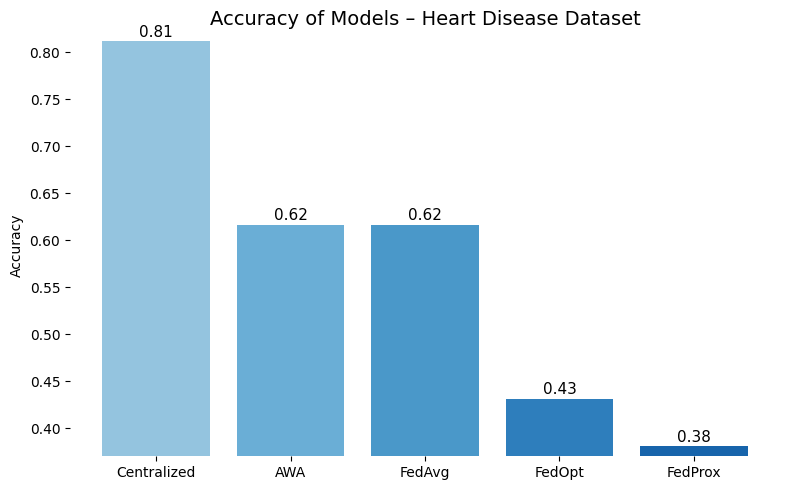

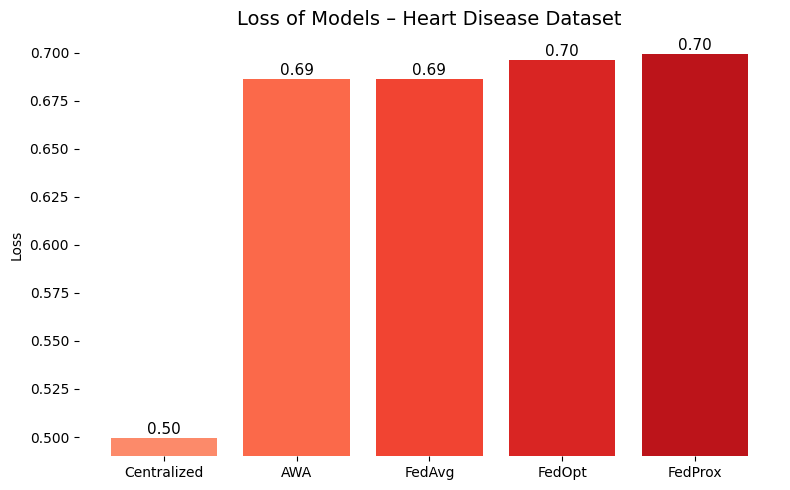

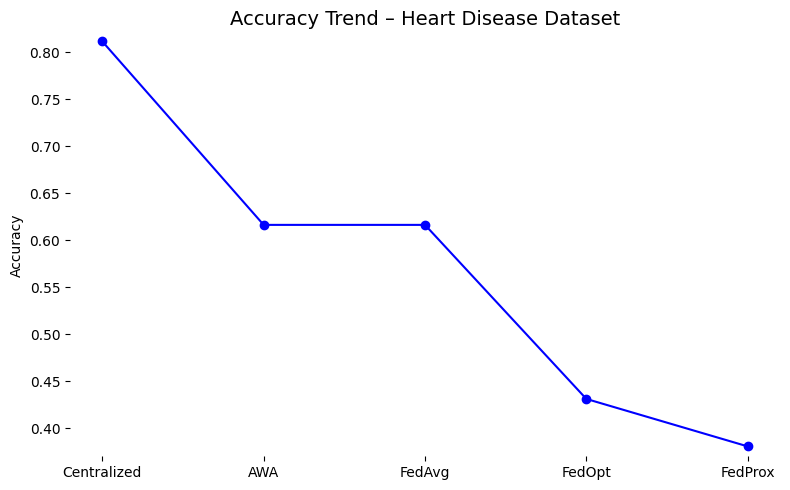

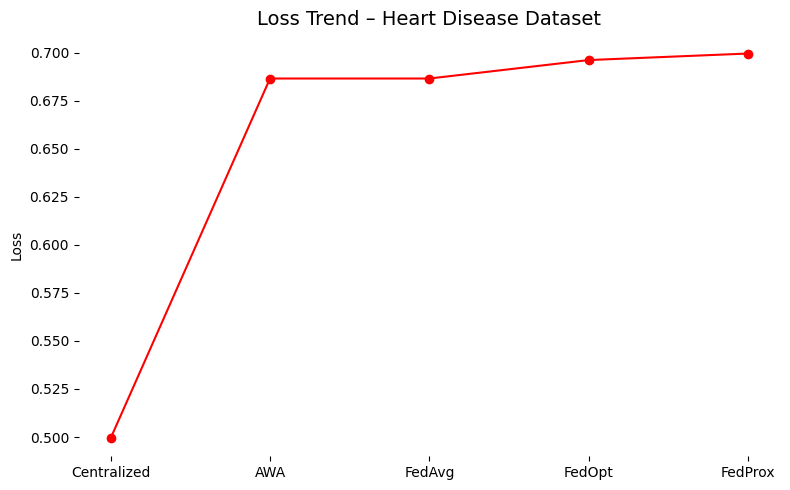

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Heart Disease Dataset – All Models (5 Rounds)
data = [
    {"Method": "Centralized", "Accuracy": 0.8114, "Loss": 0.4994},
    {"Method": "AWA", "Accuracy": 0.6162, "Loss": 0.6865},
    {"Method": "FedAvg", "Accuracy": 0.6162, "Loss": 0.6865},
    {"Method": "FedOpt", "Accuracy": 0.4310, "Loss": 0.6961},
    {"Method": "FedProx", "Accuracy": 0.3805, "Loss": 0.6995}
]

df = pd.DataFrame(data)
df = df.round(4)

# ------------------ 1. Show Table ------------------
print("Comparison Table – All Models (Heart Disease Dataset, 5 Rounds):\n")
print(df.to_string(index=False))

# ------------------ 2. Accuracy Histogram ------------------
colors_acc = cm.Blues(np.linspace(0.4, 0.8, len(df)))
plt.figure(figsize=(8, 5))
bars = plt.bar(df["Method"], df["Accuracy"], color=colors_acc)
plt.title("Accuracy of Models – Heart Disease Dataset", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0.37, 0.82)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005, f'{height:.2f}', ha='center', fontsize=11)
plt.tight_layout()
plt.show()

# ------------------ 3. Loss Histogram ------------------
colors_loss = cm.Reds(np.linspace(0.4, 0.8, len(df)))
plt.figure(figsize=(8, 5))
bars = plt.bar(df["Method"], df["Loss"], color=colors_loss)
plt.title("Loss of Models – Heart Disease Dataset", fontsize=14)
plt.ylabel("Loss")
plt.ylim(0.49, 0.71)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.002, f'{height:.2f}', ha='center', fontsize=11)
plt.tight_layout()
plt.show()

# ------------------ 4. Accuracy Trend Line ------------------
plt.figure(figsize=(8, 5))
plt.plot(df["Method"], df["Accuracy"], marker='o', linestyle='-', color='blue')
plt.title("Accuracy Trend – Heart Disease Dataset", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0.37, 0.82)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.show()

# ------------------ 5. Loss Trend Line ------------------
plt.figure(figsize=(8, 5))
plt.plot(df["Method"], df["Loss"], marker='o', linestyle='-', color='red')
plt.title("Loss Trend – Heart Disease Dataset", fontsize=14)
plt.ylabel("Loss")
plt.ylim(0.49, 0.71)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.show()


Comparison Table – All Models (Heart Disease Dataset, 5 Rounds):

     Method  Accuracy   Loss
Centralized    0.8114 0.4994
        AWA    0.6162 0.6865
     FedAvg    0.6162 0.6865
     FedOpt    0.4310 0.6961
    FedProx    0.3805 0.6995


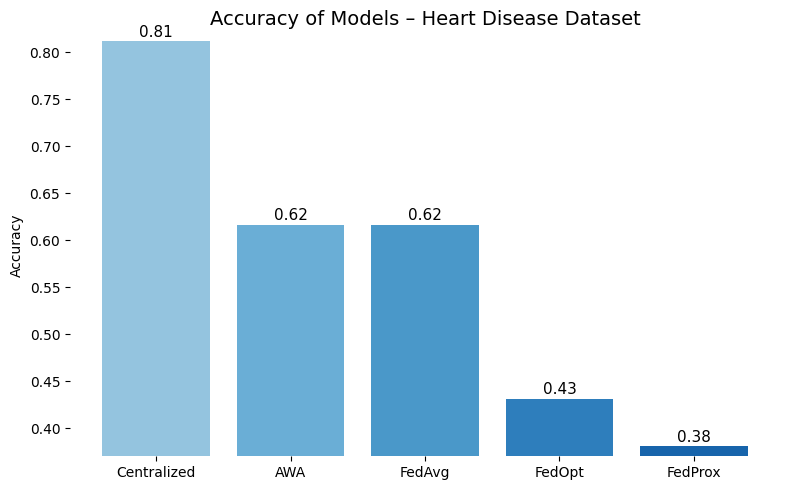

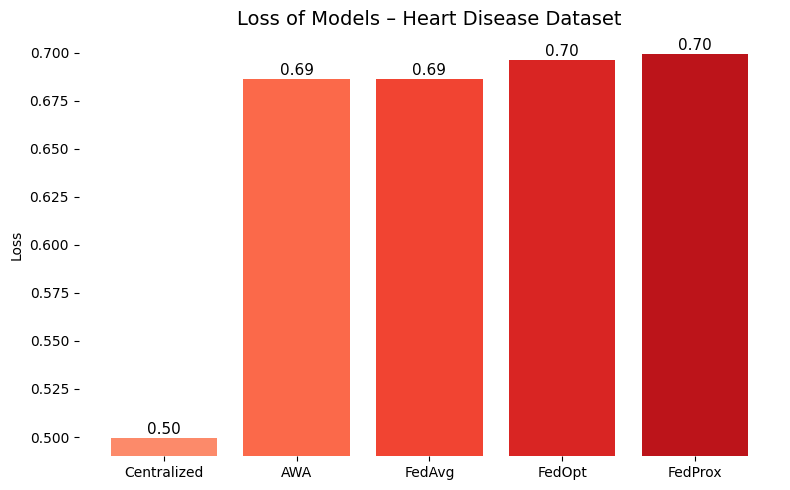

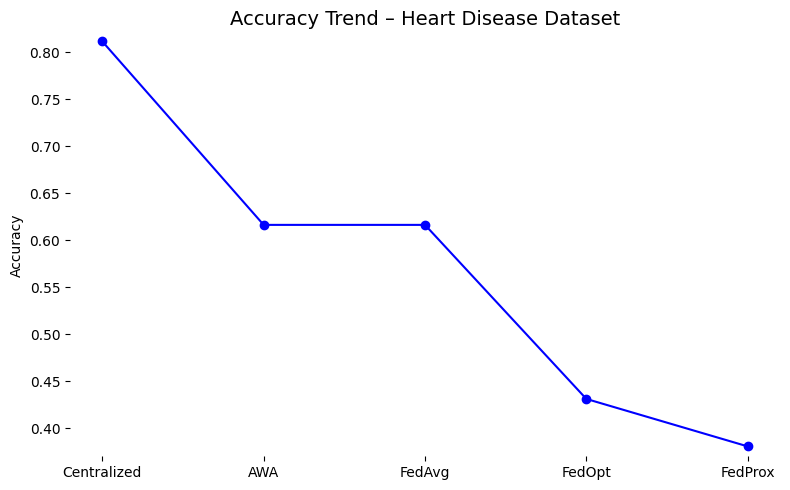

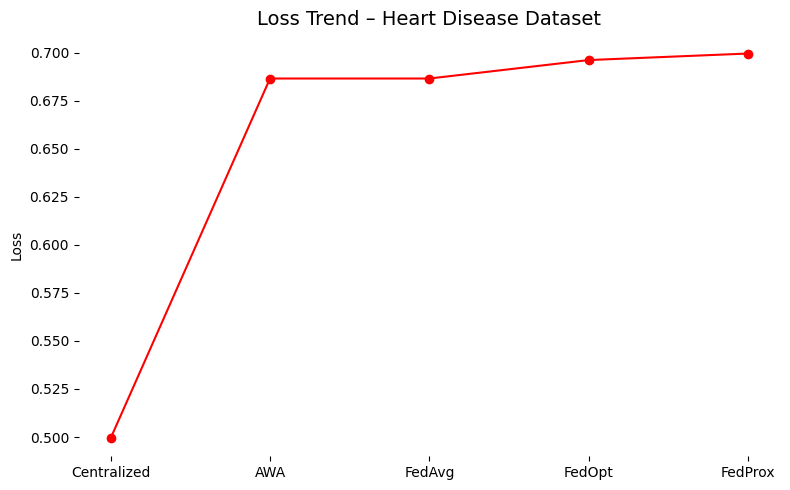

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Heart Disease Dataset – All Models (5 Rounds)
data = [
    {"Method": "Centralized", "Accuracy": 0.8114, "Loss": 0.4994},
    {"Method": "AWA", "Accuracy": 0.6162, "Loss": 0.6865},
    {"Method": "FedAvg", "Accuracy": 0.6162, "Loss": 0.6865},
    {"Method": "FedOpt", "Accuracy": 0.4310, "Loss": 0.6961},
    {"Method": "FedProx", "Accuracy": 0.3805, "Loss": 0.6995}
]

df = pd.DataFrame(data)
df = df.round(4)

# ------------------ 1. Show Table ------------------
print("Comparison Table – All Models (Heart Disease Dataset, 5 Rounds):\n")
print(df.to_string(index=False))

# ------------------ 2. Accuracy Histogram ------------------
colors_acc = cm.Blues(np.linspace(0.4, 0.8, len(df)))
plt.figure(figsize=(8, 5))
bars = plt.bar(df["Method"], df["Accuracy"], color=colors_acc)
plt.title("Accuracy of Models – Heart Disease Dataset", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0.37, 0.82)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005, f'{height:.2f}', ha='center', fontsize=11)
plt.tight_layout()
plt.show()

# ------------------ 3. Loss Histogram ------------------
colors_loss = cm.Reds(np.linspace(0.4, 0.8, len(df)))
plt.figure(figsize=(8, 5))
bars = plt.bar(df["Method"], df["Loss"], color=colors_loss)
plt.title("Loss of Models – Heart Disease Dataset", fontsize=14)
plt.ylabel("Loss")
plt.ylim(0.49, 0.71)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.002, f'{height:.2f}', ha='center', fontsize=11)
plt.tight_layout()
plt.show()

# ------------------ 4. Accuracy Trend Line ------------------
plt.figure(figsize=(8, 5))
plt.plot(df["Method"], df["Accuracy"], marker='o', linestyle='-', color='blue')
plt.title("Accuracy Trend – Heart Disease Dataset", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0.37, 0.82)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.show()

# ------------------ 5. Loss Trend Line ------------------
plt.figure(figsize=(8, 5))
plt.plot(df["Method"], df["Loss"], marker='o', linestyle='-', color='red')
plt.title("Loss Trend – Heart Disease Dataset", fontsize=14)
plt.ylabel("Loss")
plt.ylim(0.49, 0.71)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.show()


Comparison Table – Federated Models (Heart Disease Dataset):

 Method  Accuracy   Loss
    AWA    0.6162 0.6865
 FedAvg    0.6162 0.6865
 FedOpt    0.4310 0.6961
FedProx    0.3805 0.6995


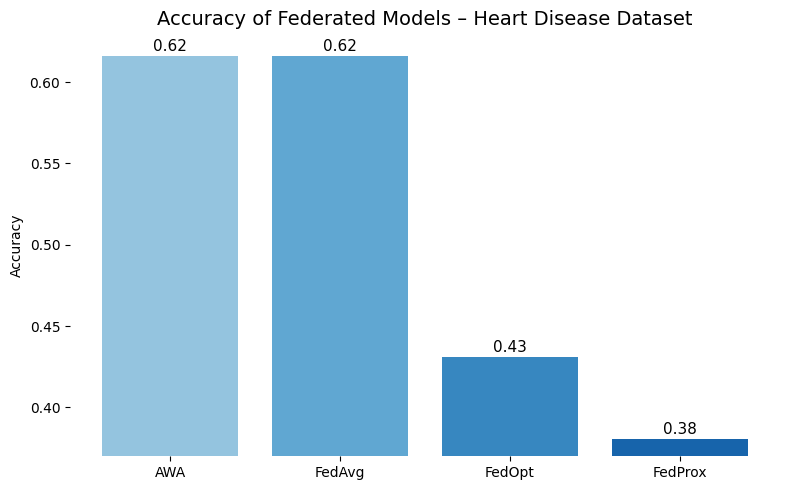

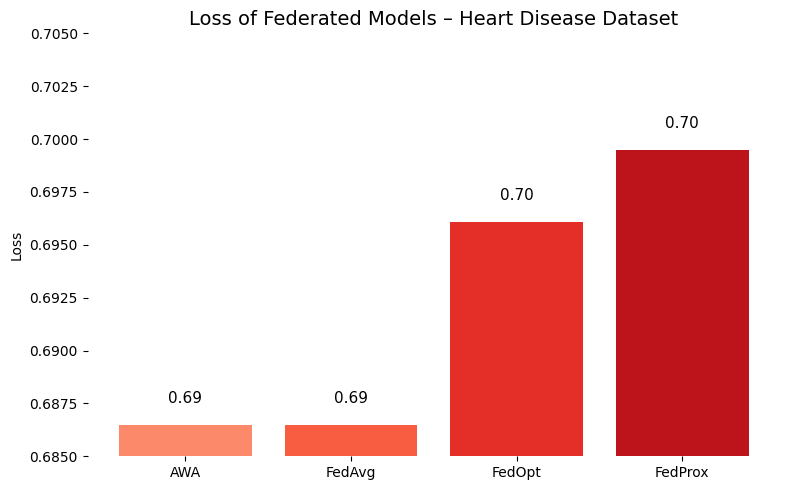

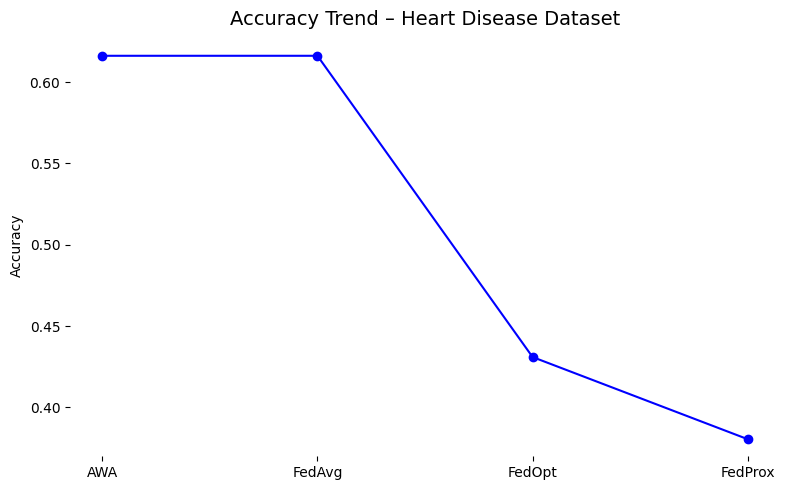

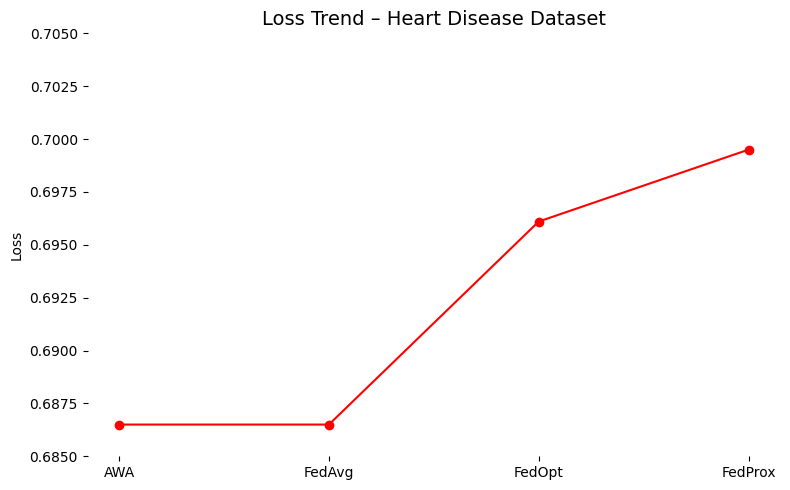

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Heart Disease Dataset – Federated Models Only
data = [
    {"Method": "AWA", "Accuracy": 0.6162, "Loss": 0.6865},
    {"Method": "FedAvg", "Accuracy": 0.6162, "Loss": 0.6865},
    {"Method": "FedOpt", "Accuracy": 0.4310, "Loss": 0.6961},
    {"Method": "FedProx", "Accuracy": 0.3805, "Loss": 0.6995}
]

df = pd.DataFrame(data)
df = df.round(4)

# 1. Table
print("Comparison Table – Federated Models (Heart Disease Dataset):\n")
print(df.to_string(index=False))

# 2. Accuracy Histogram
colors_acc = cm.Blues(np.linspace(0.4, 0.8, len(df)))
plt.figure(figsize=(8, 5))
bars = plt.bar(df["Method"], df["Accuracy"], color=colors_acc)
plt.title("Accuracy of Federated Models – Heart Disease Dataset", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0.37, 0.63)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.003, f'{height:.2f}', ha='center', fontsize=11)
plt.tight_layout()
plt.show()

# 3. Loss Histogram
colors_loss = cm.Reds(np.linspace(0.4, 0.8, len(df)))
plt.figure(figsize=(8, 5))
bars = plt.bar(df["Method"], df["Loss"], color=colors_loss)
plt.title("Loss of Federated Models – Heart Disease Dataset", fontsize=14)
plt.ylabel("Loss")
plt.ylim(0.685, 0.705)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.001, f'{height:.2f}', ha='center', fontsize=11)
plt.tight_layout()
plt.show()

# 4. Accuracy Trend
plt.figure(figsize=(8, 5))
plt.plot(df["Method"], df["Accuracy"], marker='o', linestyle='-', color='blue')
plt.title("Accuracy Trend – Heart Disease Dataset", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0.37, 0.63)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.show()

# 5. Loss Trend
plt.figure(figsize=(8, 5))
plt.plot(df["Method"], df["Loss"], marker='o', linestyle='-', color='red')
plt.title("Loss Trend – Heart Disease Dataset", fontsize=14)
plt.ylabel("Loss")
plt.ylim(0.685, 0.705)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.show()


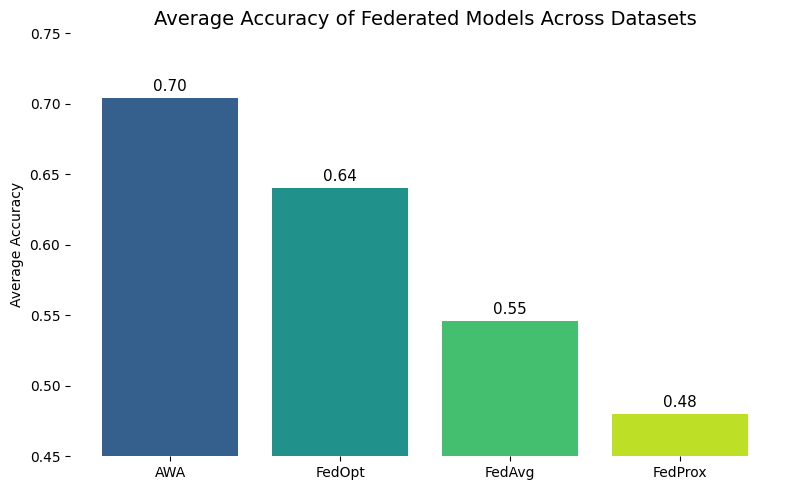

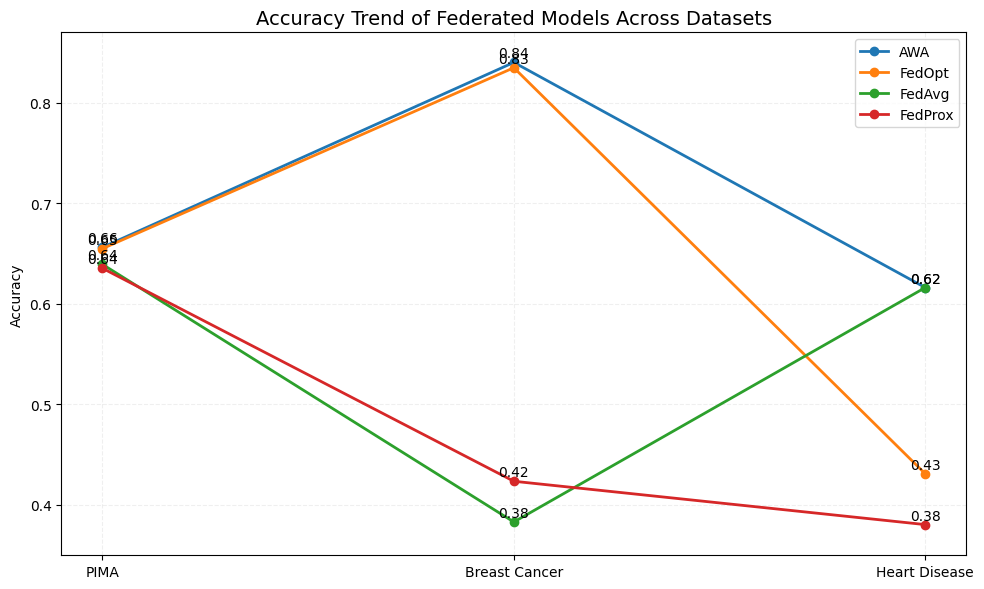

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Cross-dataset accuracy (federated models only)
data = {
    "Model": ["AWA", "FedOpt", "FedAvg", "FedProx"],
    "PIMA": [0.6562, 0.6549, 0.6393, 0.6354],
    "Breast Cancer": [0.8401, 0.8348, 0.3831, 0.4236],
    "Heart Disease": [0.6162, 0.4310, 0.6162, 0.3805]
}

# Create DataFrame and calculate averages
df_acc = pd.DataFrame(data)
df_acc["Average"] = df_acc[["PIMA", "Breast Cancer", "Heart Disease"]].mean(axis=1).round(4)

# -------- 1. Bar Chart: Average Accuracy --------
colors = cm.viridis(np.linspace(0.3, 0.9, len(df_acc)))

plt.figure(figsize=(8, 5))
bars = plt.bar(df_acc["Model"], df_acc["Average"], color=colors)
plt.title("Average Accuracy of Federated Models Across Datasets", fontsize=14)
plt.ylabel("Average Accuracy")
plt.ylim(0.45, 0.75)
plt.grid(False)

# Remove border lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005, f'{height:.2f}',
             ha='center', fontsize=11)

plt.tight_layout()
plt.show()

# -------- 2. Line Chart: Accuracy Trend Across Datasets --------
plt.figure(figsize=(10, 6))
x_labels = ["PIMA", "Breast Cancer", "Heart Disease"]
x = np.arange(len(x_labels))

for i, row in df_acc.iterrows():
    y = [row["PIMA"], row["Breast Cancer"], row["Heart Disease"]]
    plt.plot(x, y, marker='o', label=row["Model"], linewidth=2)

    # Add point labels
    for xi, yi in zip(x, y):
        plt.text(xi, yi + 0.005, f'{yi:.2f}', ha='center', fontsize=10)

plt.xticks(x, x_labels)
plt.title("Accuracy Trend of Federated Models Across Datasets", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0.35, 0.87)
plt.grid(True, linestyle='--', alpha=0.2)
plt.legend()
plt.tight_layout()
plt.show()


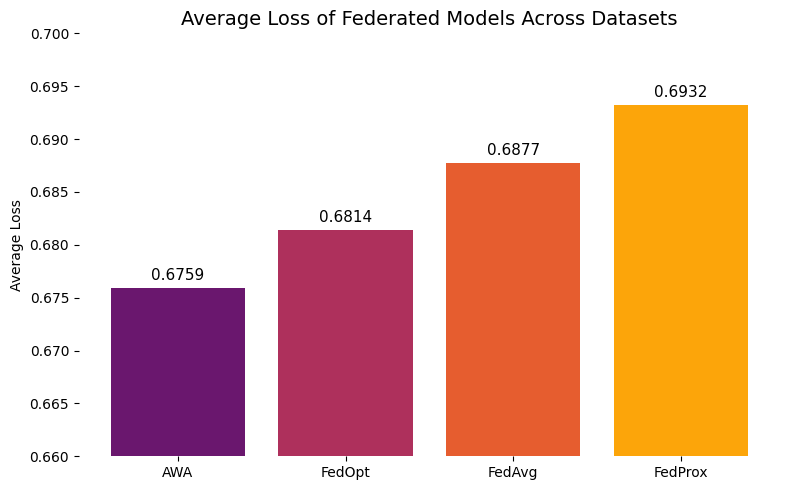

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Average Loss values (from previous cross-dataset results)
data_loss = {
    "Model": ["AWA", "FedOpt", "FedAvg", "FedProx"],
    "PIMA": [0.6788, 0.6802, 0.6876, 0.6907],
    "Breast Cancer": [0.6623, 0.6680, 0.6890, 0.6894],
    "Heart Disease": [0.6865, 0.6961, 0.6865, 0.6995]
}

# Create DataFrame and calculate averages
df_loss = pd.DataFrame(data_loss)
df_loss["Average"] = df_loss[["PIMA", "Breast Cancer", "Heart Disease"]].mean(axis=1).round(4)

# -------- Bar Chart: Average Loss --------
colors = cm.inferno(np.linspace(0.3, 0.8, len(df_loss)))

plt.figure(figsize=(8, 5))
bars = plt.bar(df_loss["Model"], df_loss["Average"], color=colors)
plt.title("Average Loss of Federated Models Across Datasets", fontsize=14)
plt.ylabel("Average Loss")
plt.ylim(0.66, 0.70)
plt.grid(False)

# Remove borders
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.0008, f'{height:.4f}',
             ha='center', fontsize=11)

plt.tight_layout()
plt.show()


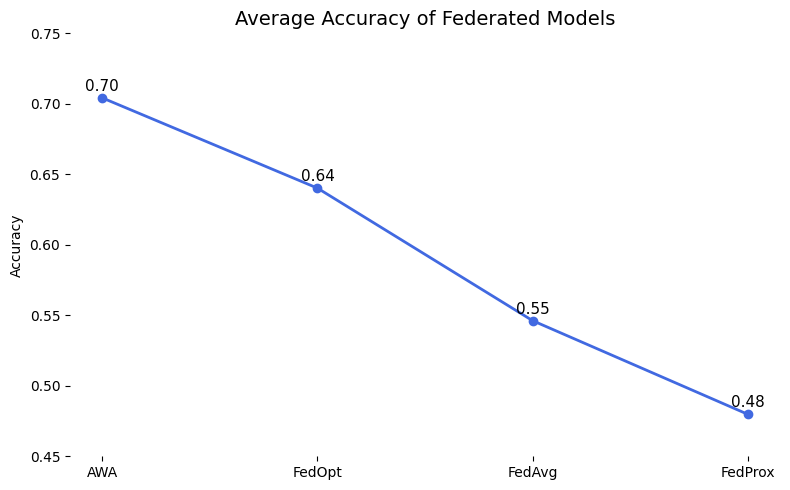

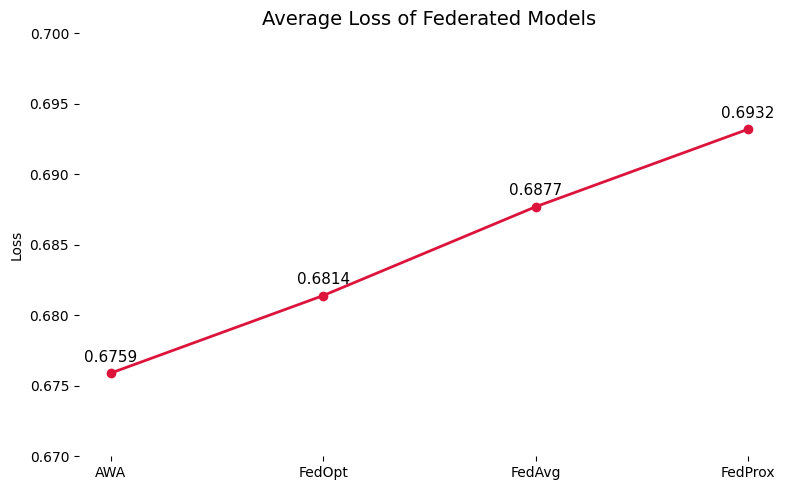

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Average performance data (only federated models)
data = {
    "Model": ["AWA", "FedOpt", "FedAvg", "FedProx"],
    "Average Accuracy": [0.7042, 0.6402, 0.5462, 0.4798],
    "Average Loss": [0.6759, 0.6814, 0.6877, 0.6932]
}

df = pd.DataFrame(data)
x = np.arange(len(df["Model"]))

# -------- Accuracy Line Chart --------
plt.figure(figsize=(8, 5))
y_acc = df["Average Accuracy"]
plt.plot(x, y_acc, marker='o', linestyle='-', color='royalblue', linewidth=2)
plt.xticks(x, df["Model"])
plt.title("Average Accuracy of Federated Models", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0.45, 0.75)
plt.grid(False)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

for xi, yi in zip(x, y_acc):
    plt.text(xi, yi + 0.005, f'{yi:.2f}', ha='center', fontsize=11)

plt.tight_layout()
plt.show()

# -------- Loss Line Chart --------
plt.figure(figsize=(8, 5))
y_loss = df["Average Loss"]
plt.plot(x, y_loss, marker='o', linestyle='-', color='crimson', linewidth=2)
plt.xticks(x, df["Model"])
plt.title("Average Loss of Federated Models", fontsize=14)
plt.ylabel("Loss")
plt.ylim(0.67, 0.70)
plt.grid(False)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

for xi, yi in zip(x, y_loss):
    plt.text(xi, yi + 0.0008, f'{yi:.4f}', ha='center', fontsize=11)

plt.tight_layout()
plt.show()
